# Proyek Analisis Data: Bike Sharing Dataset
- Nama:Bintang Margaretha Situmorang
- Email:bintangsitumorang7@gmail.com
- Id Dicoding:bintangmargaretha

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan dalam beberapa bulan terakhir di tahun 2011 dan 2012? 
- Bagaimana cuaca dan musim mempengaruhi jumlah sepeda yang disewakan?

## Menyiapkan semua library yang dibutuhkan

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [12]:
day_df = pd.read_csv("D:\S1 Sistem Informasi 2021 12S21023_Bintang Margaretha Situmorang\COURSE LIBURAN 2023\Belajar Analisis Data Dengan Python\submission\data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
hour_df = pd.read_csv("D:\S1 Sistem Informasi 2021 12S21023_Bintang Margaretha Situmorang\COURSE LIBURAN 2023\Belajar Analisis Data Dengan Python\submission\data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [15]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel `day_df`

In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Memperbaiki tipe data

In [19]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [21]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membersihkan tabel `hour_df`

In [22]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Memperbaiki tipe data

In [23]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [24]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [25]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [26]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
454,455,2012-03-30,2,1,3,0,5,1,2,0.370000,0.375621,0.580833,0.138067,796,4663,5459
455,456,2012-03-31,2,1,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617,2301,3934,6235
340,341,2011-12-07,4,0,12,0,3,1,3,0.410000,0.400246,0.970417,0.266175,50,655,705
291,292,2011-10-19,4,0,10,0,3,1,3,0.541739,0.513848,0.895217,0.243339,254,2170,2424
546,547,2012-06-30,3,1,6,0,6,0,1,0.765000,0.687508,0.601250,0.161071,1455,4232,5687


In [27]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Demografi pelanggan berdasarkan musim 

In [28]:
day_df.groupby(by="season").agg({
    "cnt": ["sum","max", "min", ("mean", lambda x: int(x.mean())), "std"]
})


cnt                               
            sum   max   min  mean          std
season                                        
1        471348  7836   431  2604  1399.942119
2        918589  8362   795  4992  1695.977235
3       1061129  8714  1115  5644  1459.800381
4        841613  8555    22  4728  1699.615261

#### Demografi pelanggan berdasarkan cuaca

In [29]:
day_df.groupby(by="weathersit").agg({
    "cnt": ["sum","max", "min", ("mean", lambda x: int(x.mean())), "std"]
})

cnt                              
                sum   max  min  mean          std
weathersit                                       
1           2257952  8714  431  4876  1879.483989
2            996858  8362  605  4035  1809.109918
3             37869  4639   22  1803  1240.284449

#### Demografi pelanggan berdasarkan musim dan cuaca

In [30]:
day_df.groupby(by=["season", "weathersit"]).agg({
    "cnt": ["sum","max", "min", ("mean", lambda x: int(x.mean())), "std"]
})

cnt                               
                      sum   max   min  mean          std
season weathersit                                       
1      1           312036  6312   431  2811  1409.960622
       2           155573  7836   605  2357  1313.332082
       3             3739  2169   441   934   826.272100
2      1           626986  8294  2028  5548  1467.655078
       2           288096  8362  1471  4236  1579.038070
       3             3507  1685   795  1169   461.679543
3      1           799443  8714  3285  5878  1356.647125
       2           250679  7582  1115  5222  1431.160502
       3            11007  4459  1842  2751  1199.339923
4      1           519487  8555  1495  5043  1595.693909
       2           302510  7852  1096  4654  1523.445365
       3            19616  4639    22  1961  1329.287378

#### Demografi pelanggan per hari berdasarkan hari kerja 

In [31]:
day_df.groupby(by=["weekday", "workingday"]).agg({
    "cnt": ["sum","max", "min", ("mean", lambda x: int(x.mean())), "std"],
})

cnt                               
                       sum   max   min  mean          std
weekday workingday                                       
0       0           444027  8227   605  4228  1872.496629
1       0            59605  6370  1000  3973  2061.976779
        1           395898  7525    22  4398  1749.872921
2       0             1013  1013  1013  1013          NaN
        1           468096  7767   683  4544  1802.560842
3       0             7403  7403  7403  7403          NaN
        1           465645  8173   441  4520  2028.275446
4       0             3920  2425  1495  1960   657.609307
        1           481475  7804   431  4720  1919.276841
5       0             6494  3368  3126  3247   171.119841
        1           481296  8362  1167  4718  1881.876462
6       0           477807  8714   627  4550  2196.693009

#### Demografi pelanggan per hari 

In [32]:
day_df.groupby(by=["season", "weathersit", "weekday", "workingday"]).agg({
    "cnt": ["sum","max", "min", ("mean", lambda x: int(x.mean())), "std"],
})

cnt                               
                                        sum   max   min  mean          std
season weathersit weekday workingday                                      
1      1          0       0           45284  4911   754  2156  1056.059396
                  1       0            8695  3129  1317  2173   755.331881
                          1           41565  6153  1321  2968  1552.325722
                  2       1           53434  6093  1450  3339  1553.732189
                  3       1           43625  6312  1162  3355  1588.607679
...                                     ...   ...   ...   ...          ...
4      2          6       0           34354  7852  2429  4907  1842.535727
       3          1       1            2787  2765    22  1393  1939.593901
                  2       1            8840  4639  1607  2946  1546.459289
                  3       1            7362  2424   705  1840   808.617132
                  6       0             627   627   627   627          NaN

[82 rows x 5 columns]

In [33]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=True)

season
1     471348
4     841613
2     918589
3    1061129
Name: cnt, dtype: int64

In [34]:
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=True)

weathersit
3      37869
2     996858
1    2257952
Name: cnt, dtype: int64

In [35]:
day_df.groupby(by=["season","weathersit"]).cnt.sum().sort_values(ascending=False)

season  weathersit
3       1             799443
2       1             626986
4       1             519487
1       1             312036
4       2             302510
2       2             288096
3       2             250679
1       2             155573
4       3              19616
3       3              11007
1       3               3739
2       3               3507
Name: cnt, dtype: int64

In [36]:
day_df.groupby(by=["weekday","workingday"]).cnt.sum().sort_values(ascending=False)

weekday  workingday
4        1             481475
5        1             481296
6        0             477807
2        1             468096
3        1             465645
0        0             444027
1        1             395898
         0              59605
3        0               7403
5        0               6494
4        0               3920
2        0               1013
Name: cnt, dtype: int64

In [37]:
day_df.groupby(by=["season", "weathersit", "weekday", "workingday"]).cnt.sum().sort_values(ascending=False)

season  weathersit  weekday  workingday
3       1           3        1             133195
                    4        1             126370
                    2        1             123893
                    0        0             106938
2       1           5        1             105232
                                            ...  
1       2           2        0               1013
        3           3        1                947
2       3           6        0                795
4       3           6        0                627
1       3           4        1                623
Name: cnt, Length: 82, dtype: int64

### Explore `hour_df`

In [38]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1872,1873,2011-03-23,2,0,3,19,0,3,1,3,0.38,0.3939,0.82,0.2537,12,147,159
651,652,2011-01-30,1,0,1,11,0,0,0,1,0.22,0.2727,0.75,0.0000,9,50,59
16210,16211,2012-11-13,4,1,11,4,0,2,1,2,0.36,0.3333,0.81,0.3881,0,9,9
2369,2370,2011-04-13,2,0,4,15,0,3,1,2,0.44,0.4394,0.72,0.2836,12,69,81
7264,7265,2011-11-04,4,0,11,7,0,5,1,2,0.40,0.4091,0.86,0.2239,10,235,245


In [39]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


#### Demografi pelanggan per jam berdasarkan hari kerja 

In [40]:
hour_df.groupby(by=["hr","weekday", "workingday"]).agg({
    "cnt": ["sum","max", "min", ("mean", lambda x: int(x.mean())), "std"],
})


cnt                         
                         sum  max min mean        std
hr weekday workingday                                
0  0       0            9775  188   6   93  45.778592
   1       0             873  140  11   58  36.789362
           1            2698  177   4   29  21.029662
   2       0              13   13  13   13        NaN
           1            2777   69   5   27  14.167722
...                      ...  ...  ..  ...        ...
23 4       0              57   36  21   28  10.606602
           1           10005  226  11   98  48.964951
   5       0             137   73  64   68   6.363961
           1           11845  256  15  116  57.879813
   6       0           12049  239  17  115  59.226637

[287 rows x 5 columns]

#### Demografi pelanggan per jam berdasarkan musim

In [41]:
hour_df.groupby(by=["hr","season"]).agg({
    "cnt": ["sum","max", "min", ("mean", lambda x: int(x.mean())), "std"],
})

cnt                         
             sum  max min mean        std
hr season                                
0  1        4878  107   2   27  21.243394
   2       10459  206   3   56  40.346886
   3       13822  207   8   73  45.248099
   4        9971  283  13   56  43.733525
1  1        3229  113   1   18  19.078708
...          ...  ...  ..  ...        ...
22 4       21871  264  13  123  50.331148
23 1        7994  185   2   44  27.536424
   2       17661  256  12   95  49.556555
   3       22986  248  20  122  46.281850
   4       15300  220  13   86  42.229462

[96 rows x 5 columns]

#### Demografi pelanggan per jam berdasarkan cuaca

In [42]:
hour_df.groupby(by=["hr","weathersit"]).agg({
    "cnt": ["sum","max", "min", ("mean", lambda x: int(x.mean())), "std"],
})

cnt                         
                 sum  max min mean        std
hr weathersit                                
0  1           28930  249   5   59  43.437921
   2            8738  283   3   47  39.414672
   3            1462  117   2   28  26.105107
1  1           16854  165   1   34  33.554863
   2            6362  168   1   35  35.512178
...              ...  ...  ..  ...        ...
22 2           19159  326  10  116  61.222709
   3            3869  215  11   70  54.017562
23 1           46239  256   6   93  51.132487
   2           14394  220   9   85  48.435157
   3            3308  163   2   49  35.426337

[75 rows x 5 columns]

#### Demografi pelanggan per jam

In [43]:
hour_df.groupby(by=["hr","season", "weathersit", "weekday", "workingday"]).agg({
    "cnt": ["sum","max", "min",("mean", lambda x: int(x.mean())), "std"],
})

cnt                         
                                         sum  max min mean        std
hr season weathersit weekday workingday                              
0  1      1          0       0           951  107   6   47  27.038910
                     1       0            75   39  11   25  14.000000
                             1           238   34   5   15   8.749422
                     2       1           160   23   5   12   4.837090
                     3       1           325   39   6   19  10.499300
...                                      ...  ...  ..  ...        ...
23 4      3          2       1            53   53  53   53        NaN
                     3       1           125   54  31   41  11.590226
                     4       1            58   45  13   29  22.627417
                     5       1            39   39  39   39        NaN
                     6       0            65   65  65   65        NaN

[2233 rows x 5 columns]

In [44]:
hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=False)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

In [45]:
hour_df.groupby(by=["hr","weekday", "workingday"]).cnt.sum().sort_values(ascending=False)

hr  weekday  workingday
17  2        1             56555
    4        1             54661
18  2        1             53784
17  3        1             52953
18  4        1             52111
                           ...  
2   2        0                 7
7   2        0                 6
4   4        0                 5
5   2        0                 3
4   2        0                 1
Name: cnt, Length: 287, dtype: int64

In [46]:
hour_df.groupby(by=["hr","season"]).cnt.sum().sort_values(ascending=False)

hr  season
17  3         107562
18  3         102330
17  2          95468
18  2          88904
17  4          86050
               ...  
4   3           1541
    4           1279
    2           1118
3   1           1108
4   1            490
Name: cnt, Length: 96, dtype: int64

In [47]:
hour_df.groupby(by=["hr","weathersit"]).cnt.sum().sort_values(ascending=False)

hr  weathersit
17  1             253718
18  1             229220
16  1             171230
19  1             171073
8   1             158998
                   ...  
3   3                375
4   3                267
18  4                164
16  4                 36
1   4                 23
Name: cnt, Length: 75, dtype: int64

In [48]:
hour_df.groupby(by=["hr","season", "weathersit", "weekday", "workingday"]).cnt.sum().sort_values(ascending=False)

hr  season  weathersit  weekday  workingday
17  3       1           4        1             15934
18  3       1           4        1             14363
17  2       1           4        1             14224
18  2       1           4        1             14089
                        2        1             13809
                                               ...  
4   1       2           1        1                 1
3   2       3           4        1                 1
5   3       3           0        0                 1
4   1       2           2        0                 1
3   1       2           1        1                 1
Name: cnt, Length: 2233, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan dalam beberapa bulan terakhir?

In [49]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1172,1173,2011-02-21,1,0,2,15,1,1,0,2,0.30,0.2727,0.70,0.4478,11,76,87
15224,15225,2012-10-01,4,1,10,13,0,1,1,2,0.60,0.6212,0.43,0.1642,80,225,305
15436,15437,2012-10-10,4,1,10,9,0,3,1,1,0.54,0.5152,0.60,0.2836,35,331,366
221,222,2011-01-10,1,0,1,12,0,1,1,2,0.20,0.1818,0.40,0.2836,5,47,52
2737,2738,2011-04-28,2,0,4,23,0,4,1,1,0.54,0.5152,0.39,0.0896,29,81,110


In [50]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Tahun 2011

In [51]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df_2011 = hour_df[hour_df['dteday'].dt.year == 2011]
monthly_hour_2011_df = hour_df_2011.resample(rule='M', on='dteday').agg({
    "instant" : "nunique",
    "cnt": "sum"
})
monthly_hour_2011_df.index = monthly_hour_2011_df.index.strftime('%B')
monthly_hour_2011_df = monthly_hour_2011_df.reset_index().rename(columns={
    "instant": "indeks_rekaman",
    "cnt": "rent_count"
})
monthly_hour_2011_df.head()


,dteday,indeks_rekaman,rent_count
0,January,688,38189
1,February,649,48215
2,March,730,64045
3,April,719,94870
4,May,744,135821


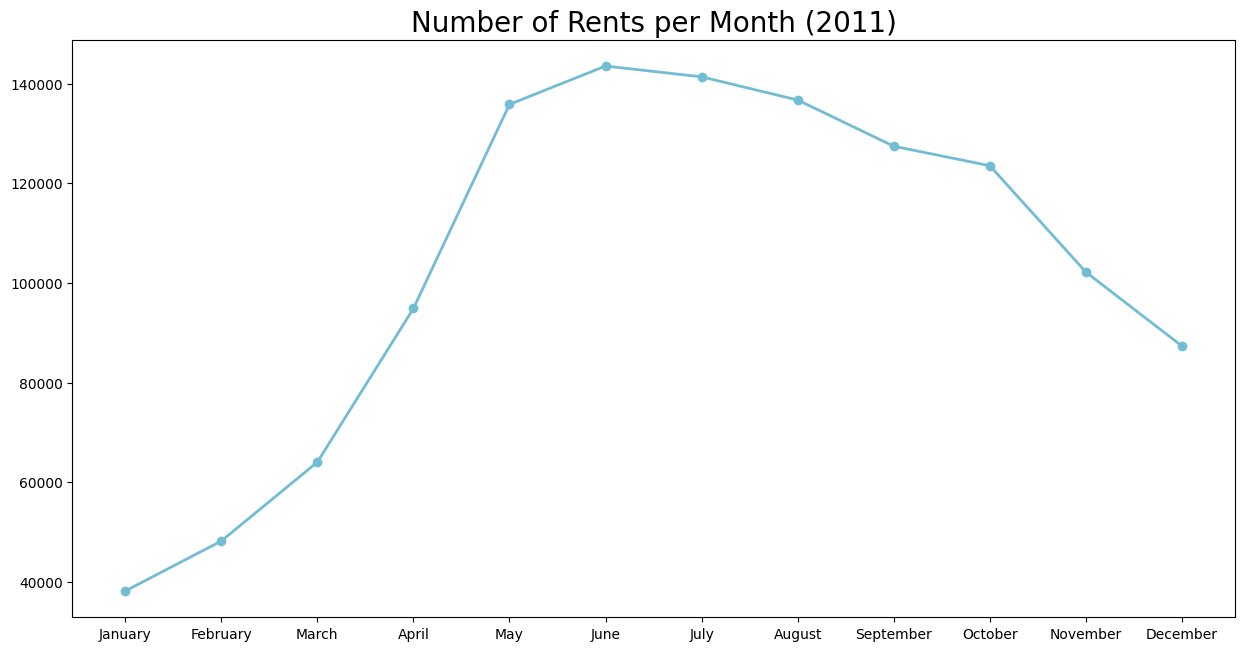

In [52]:
plt.figure(figsize=(15, 7.5))
plt.plot(
    monthly_hour_2011_df["dteday"],
    monthly_hour_2011_df["rent_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Rents per Month (2011)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

##### Tahun 2012

In [53]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df_2012 = hour_df[hour_df['dteday'].dt.year == 2012]
monthly_hour_2012_df = hour_df_2012.resample(rule='M', on='dteday').agg({
    "instant" : "nunique",
    "cnt": "sum"
})
monthly_hour_2012_df.index = monthly_hour_2012_df.index.strftime('%B')
monthly_hour_2012_df = monthly_hour_2012_df.reset_index().rename(columns={
    "instant": "indeks_rekaman",
    "cnt": "rent_count"
})
monthly_hour_2012_df.head()

,dteday,indeks_rekaman,rent_count
0,January,741,96744
1,February,692,103137
2,March,743,164875
3,April,718,174224
4,May,744,195865


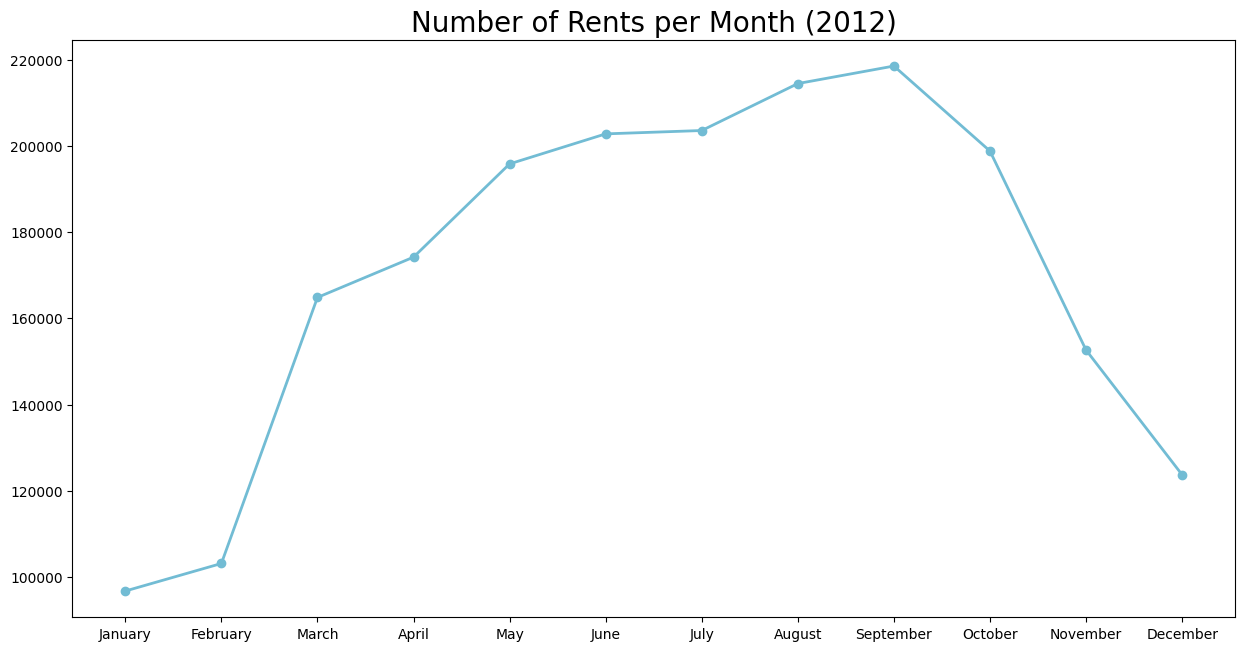

In [54]:
plt.figure(figsize=(15, 7.5))
plt.plot(
    monthly_hour_2012_df["dteday"],
    monthly_hour_2012_df["rent_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Rents per Month (2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Bagaimana cuaca dan musim mempengaruhi jumlah sepeda yang disewakan?

In [55]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Tahun 2011

###### Berdasarkan Musim

In [56]:
byseason_df = hour_df.groupby(by="season").cnt.sum().reset_index()
byseason_df.rename(columns={
    "cnt": "rent_count"
}, inplace=True)
byseason_df

,season,rent_count
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


C:\Users\Asus\AppData\Local\Temp\ipykernel_14000\3935012859.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x/100) for x in plt.gca().get_yticks()])


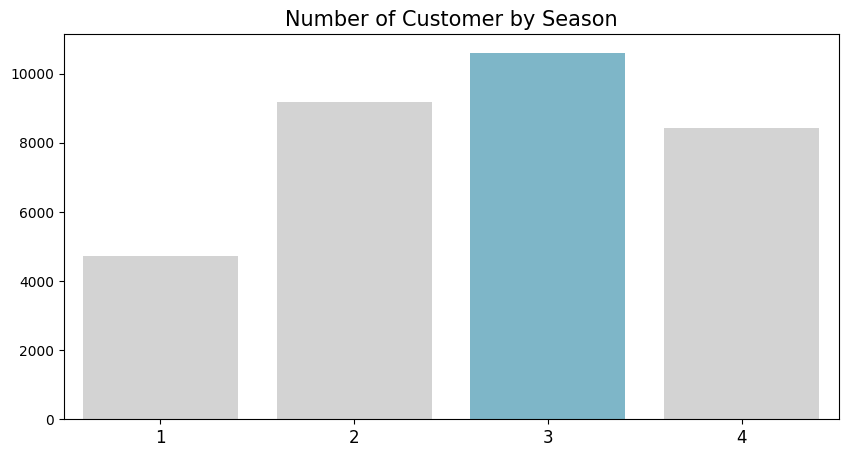

In [57]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

sns.barplot(
    y="rent_count", 
    x="season",
    data=byseason_df.sort_values(by="season", ascending=False),
    palette=colors_
)

plt.title("Number of Customer by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

plt.gca().set_yticklabels(['{:.0f}'.format(x/100) for x in plt.gca().get_yticks()])
plt.show()

###### Berdasarkan Musim

In [58]:
byweather_df = hour_df.groupby(by="weathersit").cnt.sum().reset_index()
byweather_df.rename(columns={
    "cnt": "rent_count"
}, inplace=True)
byweather_df

,weathersit,rent_count
0,1,2338173
1,2,795952
2,3,158331
3,4,223


C:\Users\Asus\AppData\Local\Temp\ipykernel_14000\881849314.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x/100) for x in plt.gca().get_yticks()])


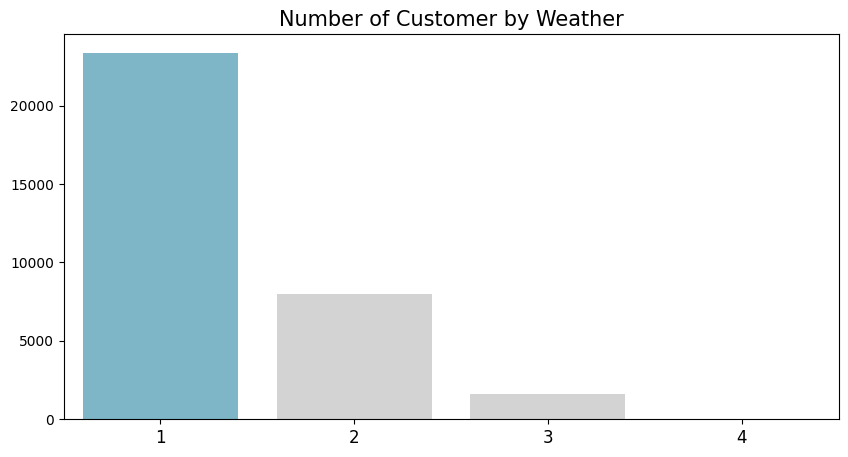

In [59]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="rent_count", 
    x="weathersit",
    data=byweather_df.sort_values(by="weathersit", ascending=False),
    palette=colors_
)

plt.title("Number of Customer by Weather", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

plt.gca().set_yticklabels(['{:.0f}'.format(x/100) for x in plt.gca().get_yticks()])
plt.show()

## Conclusion

- Conclution pertanyaan : Performa penyewaan sepeda pada tahun 2011 mengalami peningkatan dari Januari sampai Juni, dan mengalami penurunan dari bulan Juni hingga bulan Desember. Penyewaan sepeda paling tinggi terjadi di bulan Juni. Sedangkan pada tahun 2012, performa penyewaan sepeda mengalami peningkatan dari bulan Januari hingga September, dan mengalami penurunan dari September ke Desember. Penyewaan sepeda paling tinggi terjadi di bulan September.
- Conclution pertanyaan 2 : Berdasarkan musim, penyewaan sewa tertinggi terjadi pada musim gugur dan paling rendah terjadi pada musim semi. Sedangkan berdasarkan cuaca, penyewaan sepeda tertinggi terjadi pada cuaca cerah, dan penyewaan sepeda terendah terjadi pada cuaca hujan lebat, dimana tidak ada pelanggan sama sekali yang menyewa sepeda ketika cuaca tersebut terjadi